## **HS-SOFT TEST PROBLEM**

## Importing liblaries

In [107]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Creating dataset

In [106]:
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=1000, noise=.5, random_state=0)

## Visualization of created dataset

In [3]:
from matplotlib.colors import ListedColormap

In [4]:
markers = ('+', '_', 'o', '^', 'v') 
cmap = ListedColormap(('red', 'blue'))

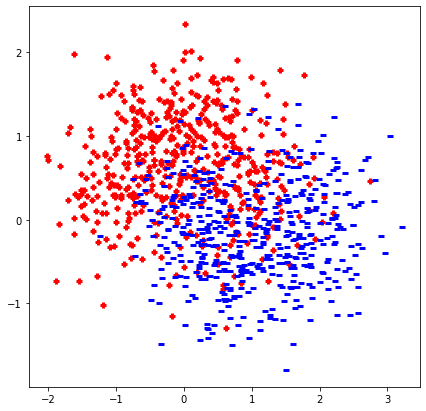

In [218]:
fig, ax = plt.subplots(figsize=(7, 7))
for idx, yval in enumerate(np.unique(y)):
    ax.scatter(x=X[y==yval, 0], y=X[y==yval, 1], c=[cmap(idx)], marker=markers[idx], label=yval, s=40, lw=3)

Text(0.5, 1.0, 'Features` distribution with respect to y')

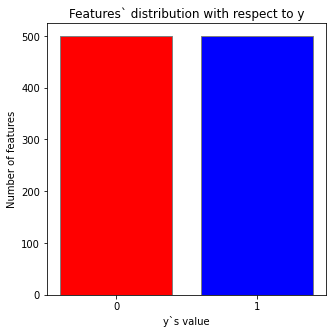

In [221]:
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(5, 5))
plt.bar('0', counts[0], color ='r',
        edgecolor ='grey')
plt.bar('1', counts[1], color ='b',
        edgecolor ='grey')
plt.xlabel('y`s value')
plt.ylabel('Number of features')
plt.title('Features` distribution with respect to y')

#### *...we have perfect-balanced class*

## Feature Standartization / Visualization...

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

In [127]:
X_scaled = scaler.fit_transform(X=X)

In [128]:
delta = 0.25

In [129]:
x1_max, x1_min = X_scaled[:, 0].max() + delta, X_scaled[:, 0].min() - delta
x2_max, x2_min = X_scaled[:, 1].max() + delta, X_scaled[:, 1].min() - delta

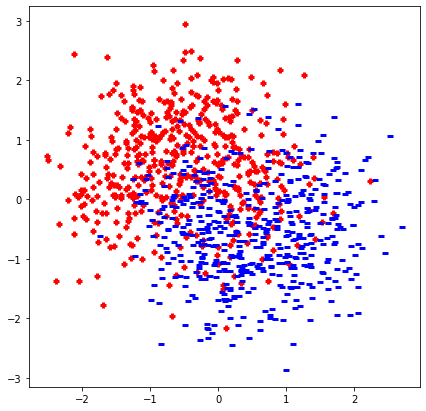

In [217]:
fig, ax = plt.subplots(figsize=(7, 7))
for idx, yval in enumerate(np.unique(y)):
    ax.scatter(x=X_scaled[y==yval, 0], y=X_scaled[y==yval, 1], c=[cmap(idx)], marker=markers[idx], label=yval, s=40, lw=3)

## Spliting features on train/test set

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=1)

## Model selection

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [149]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("Feature 1", fontsize=15)
    plt.ylabel("Feature 2", fontsize=15)

In [490]:
def plot_predictions(model, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
#     y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.coolwarm, alpha=0.4)
#     plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [480]:
# lists for plotting train/test accuracy of every model
train_accuracy = []
test_accuracy = []

In [481]:
space = [x1_min, x1_max, x2_min, x2_max]

### LINEAR SVM 

In [482]:
from sklearn.svm import LinearSVC 

Grid search for optimal value C

In [483]:
grid_search = GridSearchCV(LinearSVC(), {
    'C': np.arange(0.1, 3, 0.1),
}, cv=5, return_train_score=False)
grid_search.fit(X_scaled, y)
print("Best decision:", grid_search.best_params_)

Best decision: {'C': 0.2}


In [484]:
linear_svm_clf = LinearSVC(C=0.2)

In [485]:
linear_svm_clf.fit(X_train, y_train)

LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [486]:
print('Accuracy on the train set:', linear_svm_clf.score(X_train, y_train))
print('Accuracy on the test set:', linear_svm_clf.score(X_test, y_test))

Accuracy on the train set: 0.8014925373134328
Accuracy on the test set: 0.8272727272727273


In [487]:
print(classification_report(y_test, linear_svm_clf.predict(X_test)))
print(confusion_matrix(y_test, linear_svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       156
           1       0.84      0.83      0.84       174

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[128  28]
 [ 29 145]]


*Cross-validation* 

In [488]:
scores1 = cross_val_score(linear_svm_clf, X_scaled, y, cv=10)
print('List of 10 scores for Linear SVM:', scores1)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores1.mean(), scores1.std()))

List of 10 scores for Linear SVM: [0.89 0.82 0.77 0.83 0.79 0.84 0.79 0.82 0.75 0.77]
0.807 median accuracy with a standard deviation of 0.039


**We don't have a significant gap between scores. Good result**



#### Decision boundary

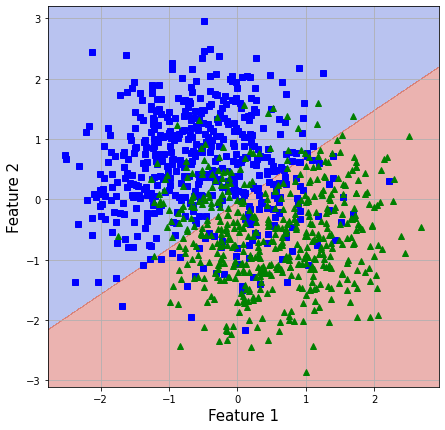

In [491]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_predictions(linear_svm_clf, space)
plot_dataset(X_scaled, y, space)

In [379]:
train_accuracy.append(linear_svm_clf.score(X_train, y_train))
test_accuracy.append(linear_svm_clf.score(X_test, y_test))

### RBF SVM

In [492]:
from sklearn.svm import SVC

Grid search for optimal C and gamma

In [493]:
#### Grid search for optimal C and gamma

In [494]:
grid_search = GridSearchCV(SVC(kernel='rbf'), {
    'C': np.arange(0.1, 3, 0.1),
    'gamma' : np.arange(0.1, 3, 0.1)
}, cv=5, return_train_score=False)
grid_search.fit(X_scaled, y)
print("Best decision:", grid_search.best_params_)

Best decision: {'C': 0.2, 'gamma': 0.8}


In [502]:
rbf_svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.8)

In [503]:
rbf_svm_clf.fit(X_train, y_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [497]:
print('Accuracy on the train set:', rbf_svm_clf.score(X_train, y_train))
print('Accuracy on the test set:', rbf_svm_clf.score(X_test, y_test))

Accuracy on the train set: 0.8223880597014925
Accuracy on the test set: 0.8272727272727273


In [504]:
print(classification_report(y_test, rbf_svm_clf.predict(X_test)))
print(confusion_matrix(y_test, rbf_svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       156
           1       0.82      0.86      0.84       174

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[124  32]
 [ 25 149]]


Cross-validation

In [505]:
scores2 = cross_val_score(rbf_svm_clf, X_scaled, y, cv=10)
print('List of 10 scores for RBF SVM:', scores2)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores2.mean(), scores2.std()))

List of 10 scores for RBF SVM: [0.89 0.83 0.79 0.84 0.81 0.86 0.81 0.84 0.79 0.79]
0.825 median accuracy with a standard deviation of 0.032


**We can see a significant increase in accuracy and a slight decrease in gap between scores. Even better result**

#### Decision boundary

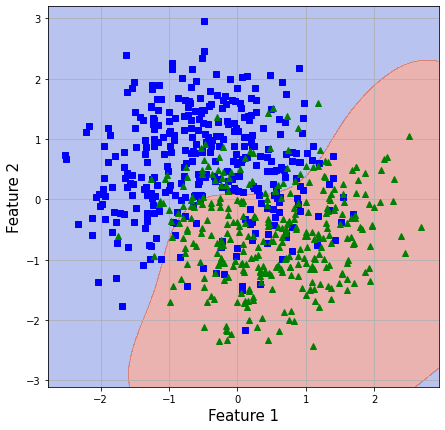

In [506]:
fig, axes = plt.subplots(figsize=(7, 7))
plot_predictions(rbf_svm_clf, space)
plot_dataset(X_train, y_train, space)

In [501]:
train_accuracy.append(rbf_svm_clf.score(X_train, y_train))
test_accuracy.append(rbf_svm_clf.score(X_test, y_test))

### DECISION TREE

In [420]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [421]:
dec_tree_clf = DecisionTreeClassifier(criterion='gini')

In [422]:
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [423]:
dec_tree_test_pred = dec_tree_clf.predict(X_test)
dec_tree_train_pred = dec_tree_clf.predict(X_train)
print('Accuracy on the train set:', dec_tree_clf.score(X_train, y_train))
print('Accuracy on the test set:', dec_tree_clf.score(X_test, y_test))

Accuracy on the train set: 1.0
Accuracy on the test set: 0.7606060606060606


**Accuracy 1 or very close to 1 on train_set - danger of overfitting. This is partially confirmed by the performance on test_set.**

In [424]:
print(classification_report(y_test, dec_tree_test_pred))
print(confusion_matrix(y_test, dec_tree_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       156
           1       0.76      0.79      0.78       174

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330

[[113  43]
 [ 36 138]]


Cross-validation

In [428]:
scores3 = cross_val_score(dec_tree_clf, X_scaled, y, cv=10)
print('List of 10 scores for Decision Tree:', scores3)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores3.mean(), scores3.std()))

List of 10 scores for Decision Tree: [0.75 0.76 0.77 0.78 0.71 0.8  0.75 0.78 0.71 0.75]
0.756 median accuracy with a standard deviation of 0.028


**Accuracy has dropped significantly and it does not dissipate much relative to its level. So far the worst result.**

#### Decision boundary

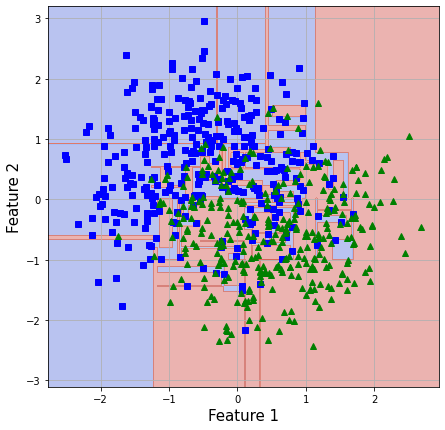

In [507]:
fig, axes = plt.subplots(figsize=(7, 7))
plot_predictions(dec_tree_clf, space)
plot_dataset(X_train, y_train, space)

**As you can see from the graph, model overfitting led to an uneven and broken line for the decision boundary**

In [427]:
train_accuracy.append(np.mean(dec_tree_train_pred == y_train))
test_accuracy.append(np.mean(dec_tree_test_pred == y_test))

### RANDOM FOREST

In [389]:
from sklearn.ensemble import RandomForestClassifier

In [390]:
random_forest_clf = RandomForestClassifier(n_estimators=100)

**I chose the number of estimators according to a general recommendation: the number is equal to the square root of the total number of samples**

In [391]:
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [392]:
rfc_test_pred = random_forest_clf.predict(X_test)
rfc_train_pred = random_forest_clf.predict(X_train)
print('Accuracy on the train set:', np.mean(rfc_train_pred == y_train))
print('Accuracy on the test set:', np.mean(rfc_test_pred == y_test))

Accuracy on the train set: 1.0
Accuracy on the test set: 0.803030303030303


**Again we see the situation with overfitting. But thanks to begging in random forests, we were able to reduce the variance of the classifier and thus increase the accuracy.**

In [393]:
print(classification_report(y_test, rfc_test_pred))
print(confusion_matrix(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       156
           1       0.82      0.81      0.81       174

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

[[124  32]
 [ 33 141]]


Cross-validation

In [432]:
scores4 = cross_val_score(random_forest_clf, X_scaled, y, cv=10)
print('List of 10 scores for Random Forest:', scores4)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores4.mean(), scores4.std()))

List of 10 scores for Random Forest: [0.8  0.81 0.81 0.83 0.76 0.78 0.78 0.79 0.76 0.78]
0.790 median accuracy with a standard deviation of 0.021


**Good result. But the medium score is still slightly worse than in RBF SVM**

#### Decision boundary

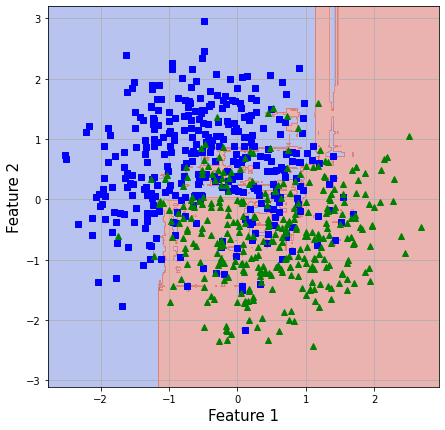

In [508]:
fig, axes = plt.subplots(figsize=(7, 7))
plot_predictions(random_forest_clf, space)
plot_dataset(X_train, y_train, space)

**Again we see a curved view of the decision boundary due to overfitting.**

In [396]:
train_accuracy.append(np.mean(rfc_train_pred == y_train))
test_accuracy.append(np.mean(rfc_test_pred == y_test))

### ADABOOST

In [397]:
from sklearn.ensemble import AdaBoostClassifier

In [398]:
abc = AdaBoostClassifier(n_estimators=100)

In [399]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [400]:
abc_test_pred = abc.predict(X_test)
abc_train_pred = abc.predict(X_train)
print('Accuracy on the train set:', np.mean(abc_train_pred == y_train))
print('Accuracy on the test set:', np.mean(abc_test_pred == y_test))

Accuracy on the train set: 0.8567164179104477
Accuracy on the test set: 0.8181818181818182


In [401]:
print(classification_report(y_test, abc_test_pred))
print(confusion_matrix(y_test, abc_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       156
           1       0.83      0.82      0.83       174

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330

[[127  29]
 [ 31 143]]


In [402]:
train_accuracy.append(np.mean(abc_train_pred == y_train))
test_accuracy.append(np.mean(abc_test_pred == y_test))

Cross-Validation

In [433]:
scores5 = cross_val_score(abc, X_scaled, y, cv=10)
print('List of 10 scores for AdaBoost:', scores5)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores5.mean(), scores5.std()))

List of 10 scores for AdaBoost: [0.84 0.84 0.78 0.79 0.81 0.86 0.79 0.82 0.78 0.8 ]
0.811 median accuracy with a standard deviation of 0.027


**Decent result.**

#### Decision boundary

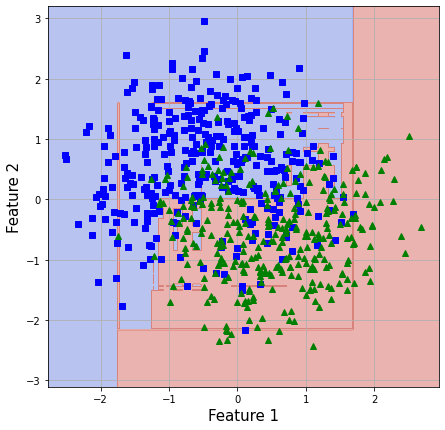

In [509]:
fig, axes = plt.subplots(figsize=(7, 7))
plot_predictions(abc, space)
plot_dataset(X_train, y_train, space)

**Again, we observe a highly complex form of the decision boundary. It seems that overfitting is still here and this kind of curve does not speak in favor of the model.**

### KNN

In [405]:
from sklearn.neighbors import KNeighborsClassifier

Grid search for optimal number of neighbors

In [471]:
grid_search = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': np.arange(1, 50, 1),
}, cv=5, return_train_score=False)
grid_search.fit(X_scaled, y)
print("Best decision:", grid_search.best_params_)

Best decision: {'n_neighbors': 40}


In [473]:
knn_model = KNeighborsClassifier(n_neighbors=40)

In [474]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [475]:
knn_model_test_pred = knn_model.predict(X_test)
knn_model_train_pred = knn_model.predict(X_train)
print('Accuracy on the train set:', np.mean(knn_model_train_pred == y_train))
print('Accuracy on the test set:', np.mean(knn_model_test_pred == y_test))

Accuracy on the train set: 0.8283582089552238
Accuracy on the test set: 0.8363636363636363


In [476]:
print(classification_report(y_test, abc_test_pred))
print(confusion_matrix(y_test, abc_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       156
           1       0.83      0.82      0.83       174

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330

[[127  29]
 [ 31 143]]


Cross-validation

In [477]:
scores6 = cross_val_score(knn_model, X_scaled, y, cv=10)
print('List of 10 scores for Random Forest:', scores6)
print("%0.3f median accuracy with a standard deviation of %0.3f" % (scores6.mean(), scores6.std()))

List of 10 scores for Random Forest: [0.86 0.86 0.8  0.83 0.77 0.85 0.81 0.82 0.8  0.81]
0.821 median accuracy with a standard deviation of 0.028


**Best result on par with RBF SVM**

#### Decision boundary

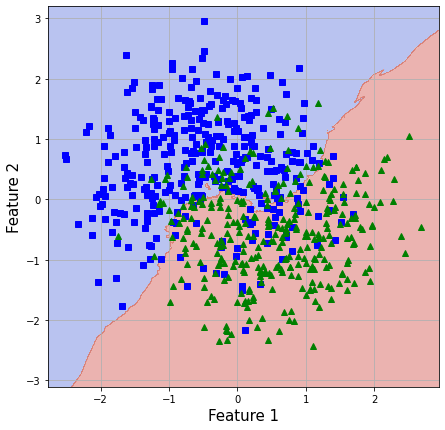

In [510]:
fig, axes = plt.subplots(figsize=(7, 7))
plot_predictions(knn_model, space)
plot_dataset(X_train, y_train, space)

**Here we can already see a smooth appearance of the decision curve**

In [413]:
train_accuracy.append(np.mean(knn_model_train_pred == y_train))
test_accuracy.append(np.mean(knn_model_test_pred == y_test))

## FINAL DECISION

In [448]:
barWidth = 0.25
br1 = ['Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'KNN']
br2 = [x + barWidth for x in np.arange(len(train_accuracy))]

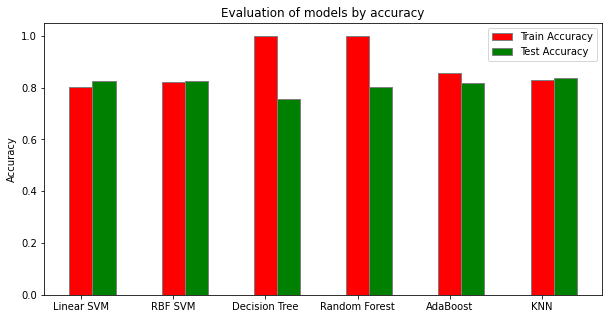

In [450]:
plt.figure(figsize=(10,5))
plt.bar(br1, train_accuracy, color ='r', width = barWidth,
        edgecolor ='grey', label ='Train Accuracy')
plt.bar(br2, test_accuracy, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Accuracy')
plt.ylabel('Accuracy')
plt.title('Evaluation of models by accuracy')
plt.legend()

In [451]:
mean_scores_list = [scores1.mean(), scores2.mean(), 
               scores3.mean(), scores4.mean(), 
               scores5.mean(), scores6.mean()]

In [452]:
std_scores_list = [scores1.std(), scores2.std(),
                    scores3.std(), scores4.std(),
                    scores5.std(), scores6.std()]

Text(0.5, 1.0, 'Evaluation of models by mean accuracy after CV (10 splits)')

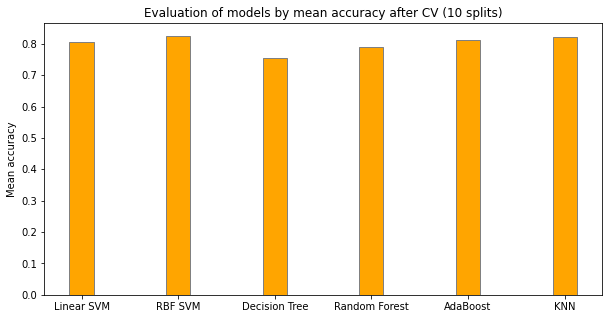

In [460]:
plt.figure(figsize=(10,5))
plt.bar(br1, mean_scores_list, color ='orange', width = barWidth,
        edgecolor ='grey')
plt.ylabel('Mean accuracy')
plt.title('Evaluation of models by mean accuracy after CV (10 splits)')

Text(0.5, 1.0, 'Measure of scores` dispersion after CV (10 splits)')

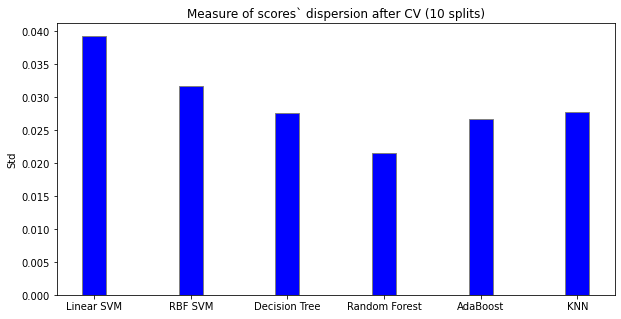

In [461]:
plt.figure(figsize=(10,5))
plt.bar(br1, std_scores_list, color ='blue', width = barWidth,
        edgecolor ='grey')
plt.ylabel('Std')
plt.title('Measure of scores` dispersion after CV (10 splits)')

Here`re my thoughts:

*   The **decision tree** shows the worst result in terms of accuracy / dispersion of scores proportion. Plus there is overfitting. Therefore, this model can be **disregarded** further.
*   The scatter plot of the data showed that the data is not linearly separable. This means that in general, **Linear SVM** will not work for us. And although it has advantages over more complex models: simplicity of calculation and almost identical calculations accuracy's terms, it, nevertheless, is always inferior to the same RBF SVM. This means that we have an algorithm that will clearly be worse than at least one available algorithm. Therefore, we **will not consider** it further either.
*   **AdaBoost** and **Random Forest** are doing well. In fact, Random Forest has the advantage of having the smallest dispersion of scores after cross-validation. This indicates the stability of the accuracy level for different input data. This is a good argument for Random Forest. Nevertheless, from the look of decision boundary for these algorithms it is clear that overfitting is present there. Therefore, I will still make a choice **not in favor** of these algorithms.
*   **KNN** and **RBF SVM** do the job better in my opinion. Both have a smooth decision boundary that follows the bend between the "moons". This is logical enough considering the creation of our data. **It remains for us to choose between these algorithms.**


#### So finally KNN or RBF SVM? 

  * Both algorithms are based on the concept of proximity. If in the case of KNN we 
decide how to classify a point by the "most" of the surrounding points, then in the case of RBF SVM we rely on proximity to the support vectors - the points that, roughly speaking, form the class boundary. 

  * By the way, speaking in more detail about this border, it is enough to implement it with a relatively small dataset. That is why RBF SVM will work well in a situation with high-dimensional data and a small number of examples. If we feed this algorithm to a large dataset, due to the complexity of the calculations, it will take too much time to determine the support vectors, which proportionally constitute a small part of the entire dataset.

  * Therefore, in my opinion, KNN will better cope with this task - an algorithm where there is no training stage as such. This is also a rather consuming algorithm in terms of time and computational capabilities. Nevertheless, in practice, this algorithm works faster (for example, building the same decision boundary), although not fast either. **Therefore, I prefer KNN** for this task.